In [1]:
import qcdenoise
import matplotlib.pyplot as plt
import qiskit as qk
import numpy as np
import networkx as nx
from networkx.algorithms.approximation import vertex_cover

#### Load the default graph state database

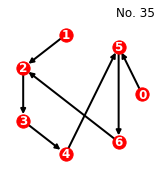

{'G': <networkx.classes.digraph.DiGraph at 0x1a4ad3e6a0>,
 'V': 7,
 'LUclass': None,
 '2Color': None}

In [2]:
graph_db = qcdenoise.GraphDB()
graph_db.plot_graph(graph_number=[35])
graph_db['35']

#### Initiate a q-circuit builder from graph states

In [3]:
n_qubits=9
circ_builder = qcdenoise.GraphCircuit(graph_db=graph_db, n_qubits=n_qubits, 
                                      verbose=True, state_simulation=False, stochastic=False)

##### The default gate type is a Controlled Phase gate

Configuration with 3 Subgraphs with # nodes:(2, 2, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges


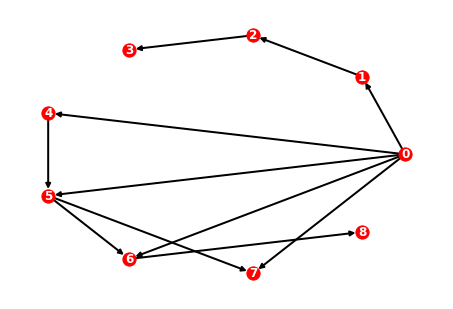

In [4]:
circ_builder.build_circuit(graph_plot=True)

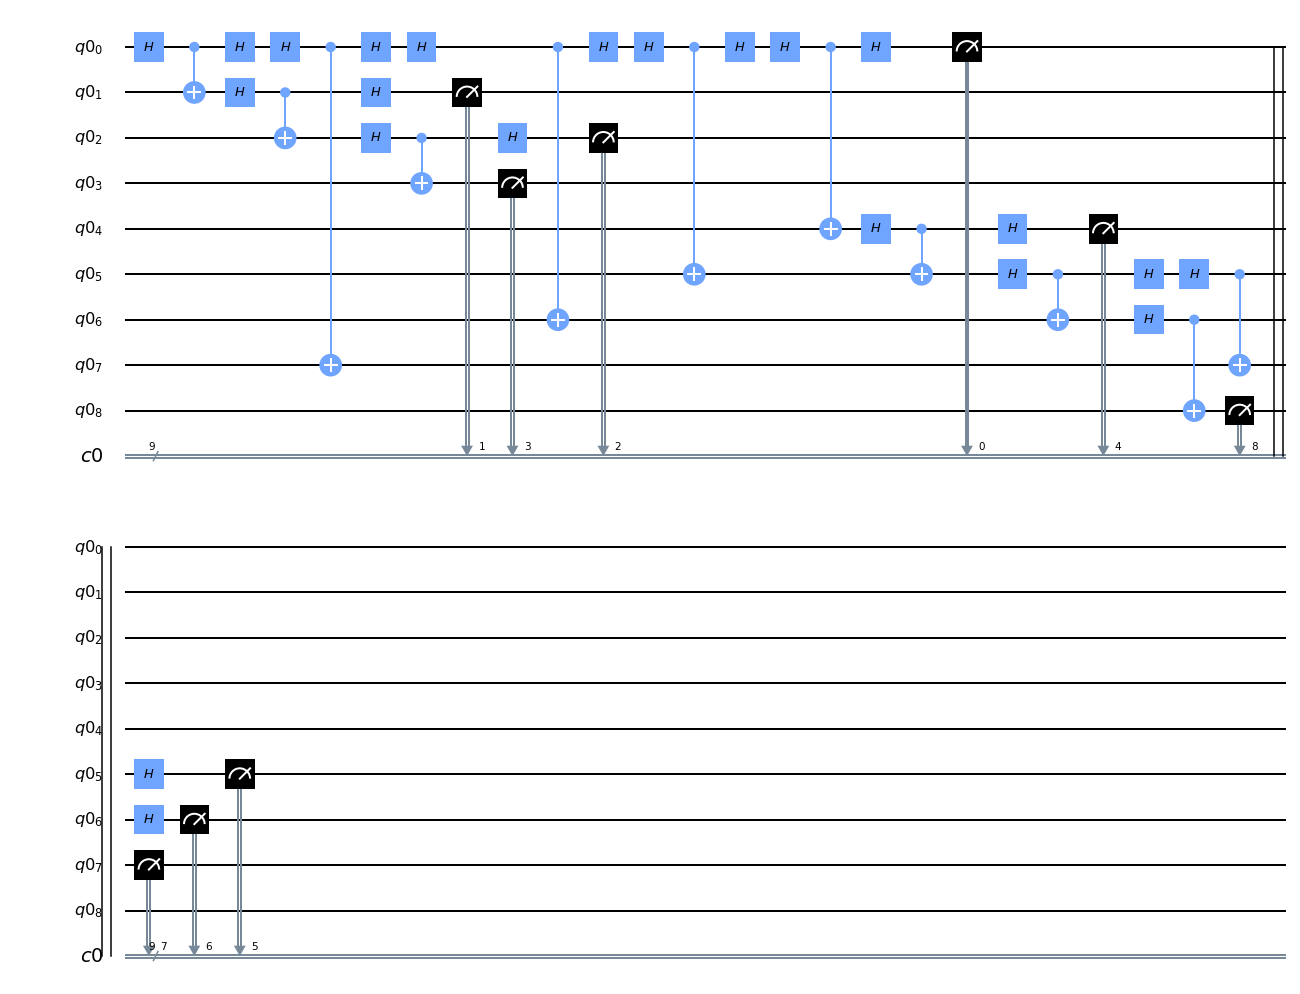

In [5]:
circ_builder.circuit.draw(output="mpl")

#### Build 10 q-circuits from random combinations of graph states subgraphs
Below is how one would interact with the `qcdenoise.CircuitConstructor` from a `qcdenoise.CircuitSampler` class.

In [6]:
circuits = []
for i in range(10):
    print("Circuit %s:" %i)
    circ_builder.build_circuit(graph_plot=False)
    circuits.append([circ_builder.circuit, circ_builder.ops_labels])

Circuit 0:
Configuration with 3 Subgraphs with # nodes:(3, 3, 3)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 1:
Configuration with 4 Subgraphs with # nodes:(2, 2, 2, 3)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 2:
Configuration with 3 Subgraphs with # nodes:(2, 3, 4)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 3:
Configuration with 2 Subgraphs with # nodes:(4, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 4:
Configuration with 3 Subgraphs with # nodes:(2, 2, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 5:
Configuration with 2 Subgraphs with # nodes:(4, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 6:
Configuration with 3 Subgraphs with # nodes:(2, 2, 5)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 7:
Configuration with 4 Subgraphs with # nodes:(2, 2, 2, 3)
Assigning a Controlled Phase Gate (H-CNOT-H) to Node Edges
Circuit 

#### Use a stochastic controlled phase gate  
Given by H-CNOT-P(U)-H, where U is a unitary gate we can transform into a noisy Krauss channel and U is inserted with a probability of 1/2.

Configuration with 3 Subgraphs with # nodes:(3, 3, 3)
Assigning a Stochastic Controlled Phase Gate (H-CNOT-P(U)-H) to Node Edges


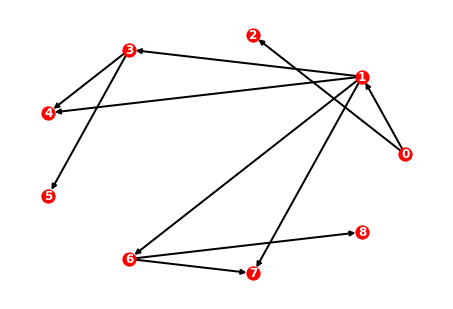

In [7]:
circ_builder = qcdenoise.GraphCircuit(graph_db=graph_db, n_qubits=9,
                                      verbose=True, state_simulation=True)
circ_builder.build_circuit(graph_plot=True)

In [8]:
circ_builder.circuit

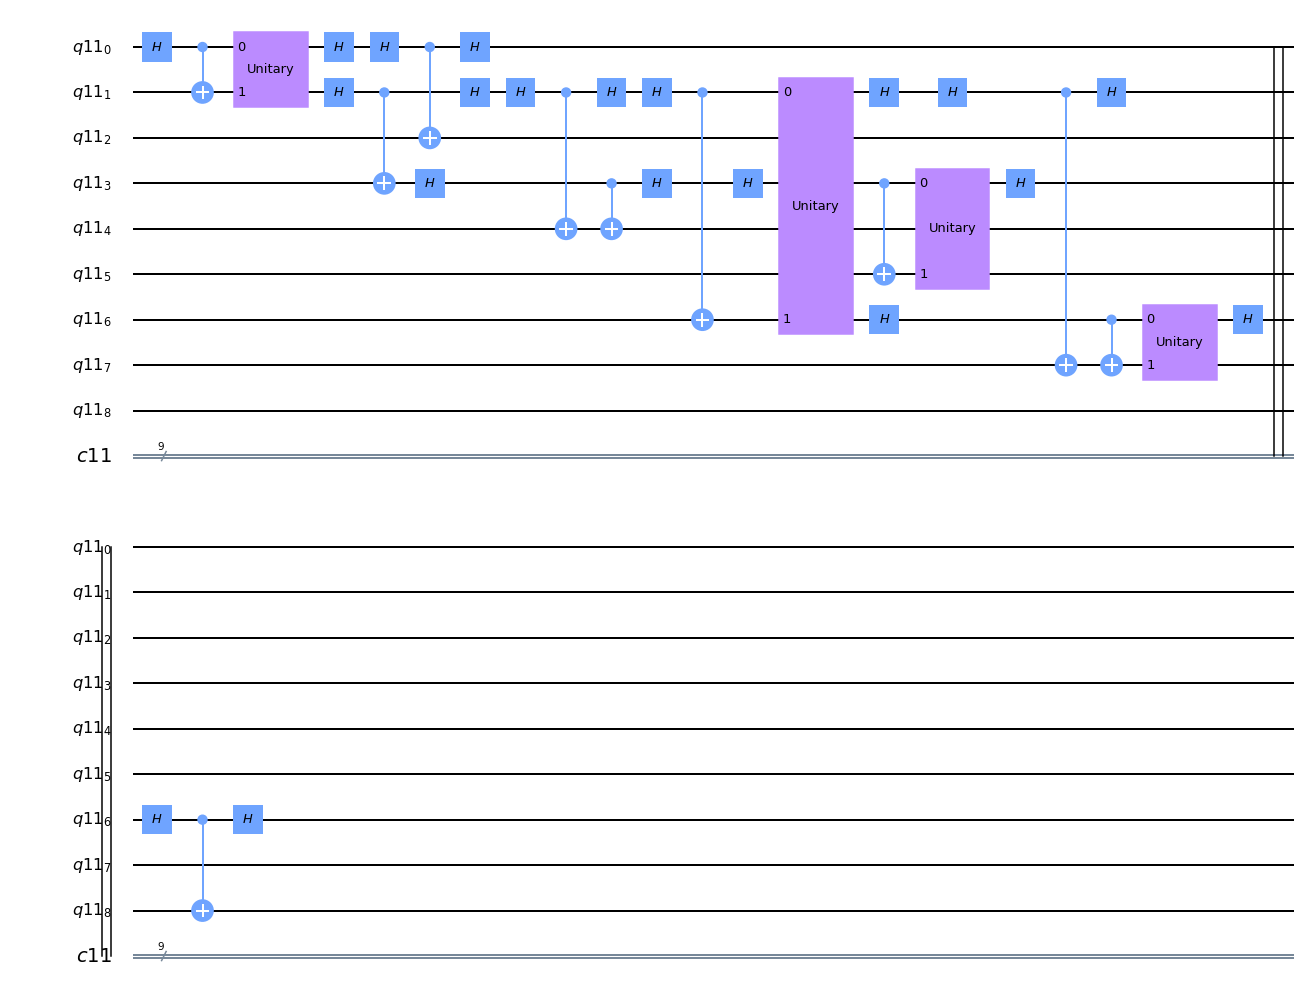

In [9]:
circ_builder.circuit.draw(output="mpl")